In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import linear_model

In [3]:
# load the dataset
iris_data=pd.read_csv('/content/IRIS.csv')

In [4]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
iris_data.shape

(150, 5)

In [10]:
iris_data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [11]:
sns.set()

<Axes: xlabel='species', ylabel='count'>

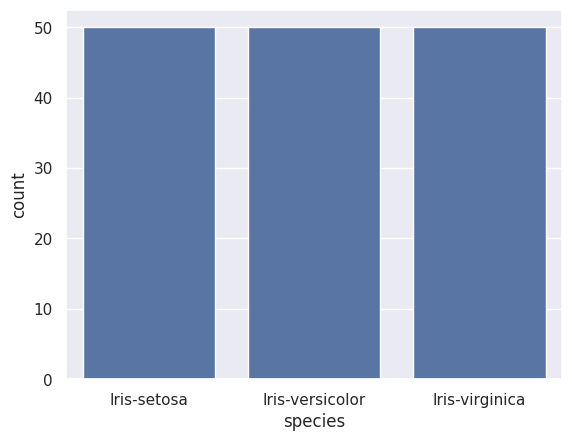

In [14]:
sns.countplot(x='species',data=iris_data)

<Axes: xlabel='sepal_length'>

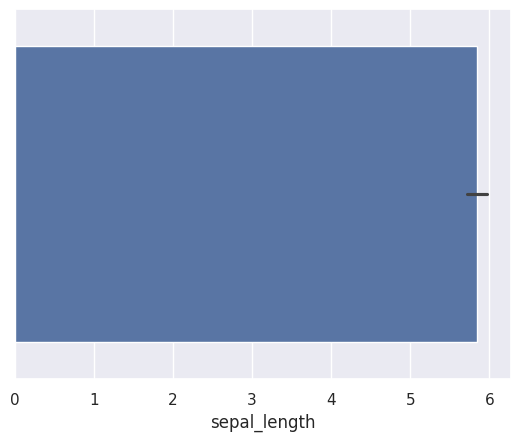

In [13]:
sns.barplot(x='sepal_length',data=iris_data)

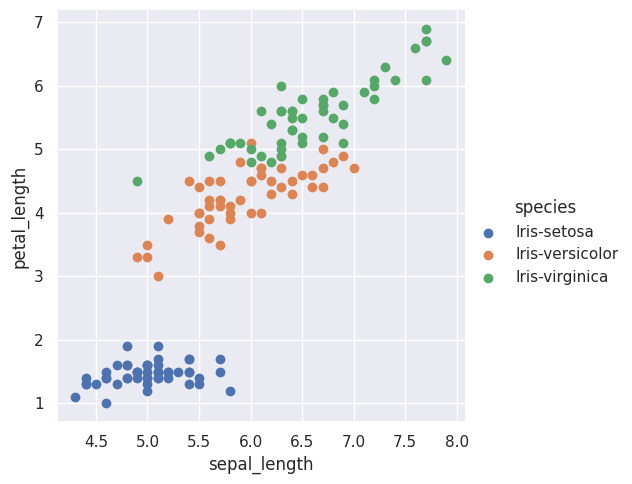

In [15]:
sns.FacetGrid(iris_data,hue='species',height=5).map(plt.scatter,'sepal_length','petal_length').add_legend()

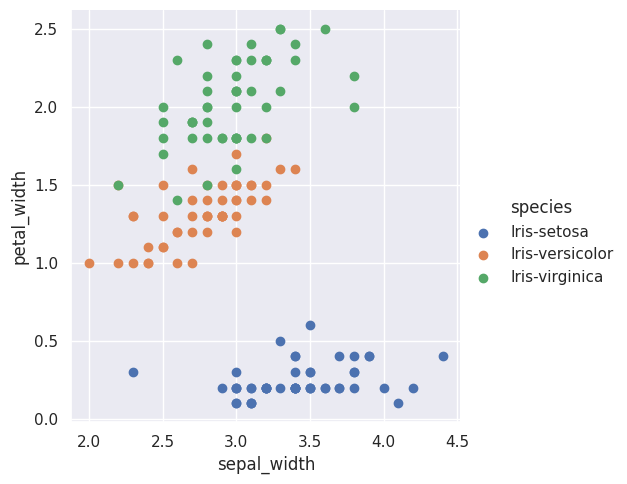

In [16]:
sns.FacetGrid(iris_data,hue='species',height=5).map(plt.scatter,'sepal_width','petal_width').add_legend()

In [29]:
selected_columns = ['sepal_width', 'sepal_length', 'petal_width', 'petal_length']

In [30]:
X = iris_data[selected_columns].values
Y=iris_data[['species']].values

In [31]:
print(X)

[[3.5 5.1 0.2 1.4]
 [3.  4.9 0.2 1.4]
 [3.2 4.7 0.2 1.3]
 [3.1 4.6 0.2 1.5]
 [3.6 5.  0.2 1.4]
 [3.9 5.4 0.4 1.7]
 [3.4 4.6 0.3 1.4]
 [3.4 5.  0.2 1.5]
 [2.9 4.4 0.2 1.4]
 [3.1 4.9 0.1 1.5]
 [3.7 5.4 0.2 1.5]
 [3.4 4.8 0.2 1.6]
 [3.  4.8 0.1 1.4]
 [3.  4.3 0.1 1.1]
 [4.  5.8 0.2 1.2]
 [4.4 5.7 0.4 1.5]
 [3.9 5.4 0.4 1.3]
 [3.5 5.1 0.3 1.4]
 [3.8 5.7 0.3 1.7]
 [3.8 5.1 0.3 1.5]
 [3.4 5.4 0.2 1.7]
 [3.7 5.1 0.4 1.5]
 [3.6 4.6 0.2 1. ]
 [3.3 5.1 0.5 1.7]
 [3.4 4.8 0.2 1.9]
 [3.  5.  0.2 1.6]
 [3.4 5.  0.4 1.6]
 [3.5 5.2 0.2 1.5]
 [3.4 5.2 0.2 1.4]
 [3.2 4.7 0.2 1.6]
 [3.1 4.8 0.2 1.6]
 [3.4 5.4 0.4 1.5]
 [4.1 5.2 0.1 1.5]
 [4.2 5.5 0.2 1.4]
 [3.1 4.9 0.1 1.5]
 [3.2 5.  0.2 1.2]
 [3.5 5.5 0.2 1.3]
 [3.1 4.9 0.1 1.5]
 [3.  4.4 0.2 1.3]
 [3.4 5.1 0.2 1.5]
 [3.5 5.  0.3 1.3]
 [2.3 4.5 0.3 1.3]
 [3.2 4.4 0.2 1.3]
 [3.5 5.  0.6 1.6]
 [3.8 5.1 0.4 1.9]
 [3.  4.8 0.3 1.4]
 [3.8 5.1 0.2 1.6]
 [3.2 4.6 0.2 1.4]
 [3.7 5.3 0.2 1.5]
 [3.3 5.  0.2 1.4]
 [3.2 7.  1.4 4.7]
 [3.2 6.4 1.5 4.5]
 [3.1 6.9 1.

In [32]:
print(Y)

[['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['

In [33]:
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [34]:
print(X.shape,X_train.shape,X_test.shape)

(150, 4) (120, 4) (30, 4)


In [35]:
model=LogisticRegression()

In [38]:
model1=LogisticRegression()

In [36]:
model.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [39]:
model1.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [40]:
model.score(X,Y),round(2)

(0.9733333333333334, 2)

In [43]:
#accuracy on training data
X_train_prediction = model1.predict(X_train)

In [44]:
print(X_train_prediction)

['Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' '

In [45]:
Actual=Y
predit=model.predict(X)

In [48]:
from sklearn import metrics
print(metrics.classification_report(Actual,predit))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.98      0.94      0.96        50
 Iris-virginica       0.94      0.98      0.96        50

       accuracy                           0.97       150
      macro avg       0.97      0.97      0.97       150
   weighted avg       0.97      0.97      0.97       150



In [49]:
print(metrics.confusion_matrix(Actual,predit))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [50]:
predit=model.predict([[5.1,5.5,1.4,0.2]])
predit

array(['Iris-setosa'], dtype=object)

In [51]:
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy_score_of_training_data : ', training_data_accuracy)

Accuracy_score_of_training_data :  0.975
